# Day 9 – Session 2: Final Project Integration Workshop

**Overview**: In this workshop, students assemble a skeleton of the final project pipeline. We provide stub functions for each component: vision (color detection), mapping (pixel-to-world), motion planning (trajectory generation), and decision-making. End of project integration skeleton. Fill in TODOs and verify each component! (Mentors should encourage testing each part and provide prompts).

**Guidance for Students**:
- Fill in each TODO by implementing the required logic or algorithm.
- After writing code, test each function independently (e.g., show the mask in detect_red_circle).
- Use print statements or plots to verify outputs at each stage.
- Collaborate with peers: have someone review your pixel_to_world math or decision rules.


In [ ]:
!pip install pybullet opencv-python numpy matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 MB 7.9 MB/s eta 0:00:00


In [ ]:
import numpy as np
import cv2
import pybullet as p, pybullet_data
import matplotlib.pyplot as plt

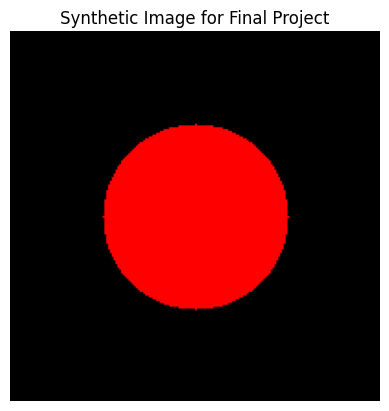

In [ ]:
# Create or load the synthetic red-circle image
image = np.zeros((200, 200, 3), dtype=np.uint8)
cv2.circle(image, (100, 100), 50, (0, 0, 255), -1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Synthetic Image for Final Project')
plt.axis('off')
plt.show()


In [ ]:
def detect_red_circle(image):
    """
    Detect the red circle in the image and return its center (cx, cy).
    TODO: Implement color detection (HSV threshold + contour).
    """
    # Example placeholder implementation (to be replaced)
    return None


In [ ]:
def pixel_to_world(cx, cy, image_size, plane_size):
    """
    Map pixel coordinates (cx, cy) to world coordinates (x, y).
    image_size: (height, width), plane_size: size of plane in meters.
    TODO: Implement actual calibration mapping.
    """
    # Example placeholder: center of image maps to (0,0)
    return (0.0, 0.0)


In [ ]:
def plan_trajectory(start_angles, target_position):
    """
    Plan a joint-space trajectory from start_angles to reach target_position (x,y,z).
    TODO: Implement motion planning (e.g., linear interpolation + IK).
    """
    # Placeholder: return an empty list for now
    return []


In [ ]:
def decide_bin(features):
    """
    Decide sorting bin based on object features (e.g., [hue, area]).
    TODO: Implement decision logic (rule-based or ML).
    """
    # Placeholder: always choose bin 0
    return 0


In [ ]:
# Main integration pipeline outline
# 1. Vision: detect red circle
detected_center = detect_red_circle(image)  # Expected to return (cx, cy)
print("Detected center:", detected_center)

# 2. Mapping: convert pixel to world coordinates
if detected_center:
    world_coords = pixel_to_world(detected_center[0], detected_center[1], image.shape[:2], 1.0)
else:
    world_coords = None
print("Mapped world coords:", world_coords)

# 3. Motion Planning: generate trajectory from home to world_coords
start_angles = [0.0, 0.0, 0.0]  # Example start pose
trajectory = plan_trajectory(start_angles, world_coords)
print("Planned trajectory:", trajectory)

# 4. Decision Making: choose sorting bin based on features
# For example, compute mean hue and area for features
hue_mean = hsv[:,:,0].mean() if 'hsv' in globals() else 0
area_sum = np.sum(cv2.inRange(cv2.cvtColor(image, cv2.COLOR_BGR2HSV), np.array([0,100,100]), np.array([10,255,255]))>0)
decision = decide_bin([hue_mean, area_sum])
print("Decided bin:", decision)


Detected center: None
Mapped world coords: None
Planned trajectory: []
Decided bin: 0


In [ ]:
# Setup simulation (plane + KUKA robot) for final integration
p.connect(p.DIRECT)
p.setAdditionalSearchPath(pybullet_data.getDataPath())
planeId = p.loadURDF("plane.urdf")
kukaId  = p.loadURDF("kuka_iiwa/model.urdf", useFixedBase=True)
print("Simulation ready (plane + KUKA).")


Simulation ready (plane + KUKA).


In [ ]:
# (Placeholders) In an actual run, we would execute the trajectory here
for joint_angles in trajectory:
    for j, angle in enumerate(joint_angles):
        p.resetJointState(kukaId, j, angle)
    p.stepSimulation()
print("Executed trajectory in simulation (stub).")


Executed trajectory in simulation (stub).


In [ ]:
p.disconnect()
print("Simulation ended.")


Simulation ended.


In [ ]:
# Testing stub functions (with dummy inputs)
print("Test detect:", detect_red_circle(np.zeros((10,10,3), dtype=np.uint8)))
print("Test mapping:", pixel_to_world(5,5,(10,10),1.0))
print("Test plan:", plan_trajectory([0,0], [0,0,0]))
print("Test decide:", decide_bin([0,0]))


Test detect: None
Test mapping: (0.0, 0.0)
Test plan: []
Test decide: 0


Example mask pixel count: 7845


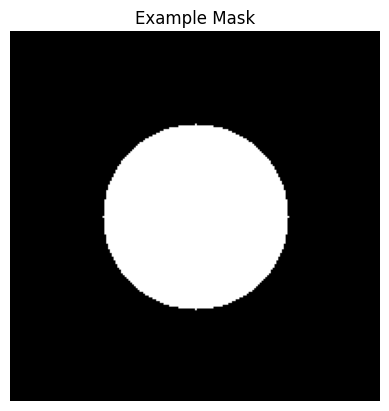

In [ ]:
# Example of mask creation (students could use this code in detect_red_circle)
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv, np.array([0,100,100]), np.array([10,255,255]))
print("Example mask pixel count:", np.sum(mask>0))
plt.imshow(mask, cmap='gray'); plt.title('Example Mask'); plt.axis('off'); plt.show()


In [ ]:
# Example usage of stubs with dummy trajectory
for point in trajectory:
    print("Moving joints to:", point)


In [ ]:
hue_val = hsv[:,:,0].mean() if 'hsv' in globals() else 0
area_val = np.sum(mask > 0)
print(f"Hue avg = {hue_val:.1f}, Area = {area_val}")
print("Bin choice (stub):", decide_bin([hue_val, area_val]))


Hue avg = 0.0, Area = 7845
Bin choice (stub): 0


**🛠️ Workshop Checklist**

1. Vision ✅  
   - `detect_red_circle` returns `(cx,cy)` for at least 3 test images.  

2. Mapping ✅  
   - Print `(cx,cy) → (x_w,y_w)`; verify by placing a PyBullet sphere.  

3. Planning ✅  
   - `plan_trajectory` outputs ≥ 5 waypoints.  
   - Plot each joint vs. step to confirm smoothness.  

4. Decision-making ✅  
   - Show confusion matrix on validation set.  

5. End‑to‑End Demo 🚀  
   - Run pipeline; arm should point at sphere, then print chosen bin.  
   - Peer‑review: trade computers and test each other’s notebooks.

**🌟 Reflection**

- *Where did most bugs appear (vision, mapping, planning, decision)?*  
- *If given a real robot, which module would likely need the most recalibration?*  
- *What one improvement would you add if you had another day?*


Note: Replace all 'TODO' sections above with your implementations.

In [ ]:
# Test mapping with a sample pixel
test_center = (80, 120)
mapped = pixel_to_world(test_center[0], test_center[1], image.shape[:2], 1.0)
print(f"Test mapping: pixel {test_center} -> world {mapped}")


Test mapping: pixel (80, 120) -> world (0.0, 0.0)
